In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://raw.githubusercontent.com/JoelQFernandez/DSC-478---Programming-Machine-Learning-Applications---Final-Project/main/Data/spotify-pca.csv'
spotify = pd.read_csv(url)
spotify

,artists,id,name,year,mode_0,acousticness,explicit_0,instrumentalness,key,valence
0,['Mamie Smith'],0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,1920s,1,0.991000,1,0.000522,0.454545,0.6340
1,"[""Screamin' Jay Hawkins""]",0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920s,1,0.643000,1,0.026400,0.454545,0.9500
2,['Mamie Smith'],11m7laMUgmOKqI3oYzuhne,Golfing Papa,1920s,0,0.993000,1,0.000018,0.000000,0.6890
3,['Oscar Velazquez'],19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920s,0,0.000173,1,0.801000,0.181818,0.0422
4,['Mixe'],2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920s,1,0.295000,0,0.000246,0.909091,0.2990
...,...,...,...,...,...,...,...,...,...,...
174384,"['DJ Combo', 'Sander-7', 'Tony T']",46LhBf6TvYjZU2SMvGZAbn,The One,2020s,1,0.009170,1,0.000060,0.545455,0.1860
174385,['Alessia Cara'],7tue2Wemjd0FZzRtDrQFZd,A Little More,2020s,0,0.795000,1,0.000000,0.363636,0.2280
174386,['Roger Fly'],48Qj61hOdYmUCFJbpQ29Ob,Together,2020s,1,0.806000,1,0.920000,0.363636,0.7140
174387,['Taylor Swift'],1gcyHQpBQ1lfXGdhZmWrHP,champagne problems,2020s,0,0.920000,0,0.000000,0.000000,0.3200


In [3]:
# dataframe to be used for DBSCAN made up of the features from PCA dimensionality reduction
df = spotify[['mode_0',
 'acousticness',
 'explicit_0',
 'instrumentalness',
 'key',
 'valence']]
df

,mode_0,acousticness,explicit_0,instrumentalness,key,valence
0,1,0.991000,1,0.000522,0.454545,0.6340
1,1,0.643000,1,0.026400,0.454545,0.9500
2,0,0.993000,1,0.000018,0.000000,0.6890
3,0,0.000173,1,0.801000,0.181818,0.0422
4,1,0.295000,0,0.000246,0.909091,0.2990
...,...,...,...,...,...,...
174384,1,0.009170,1,0.000060,0.545455,0.1860
174385,0,0.795000,1,0.000000,0.363636,0.2280
174386,1,0.806000,1,0.920000,0.363636,0.7140
174387,0,0.920000,0,0.000000,0.000000,0.3200


In [4]:
# random sample the data
sample = df.sample(frac=0.1, random_state=3)
sample

,mode_0,acousticness,explicit_0,instrumentalness,key,valence
16762,0,0.8360,1,0.000010,0.000000,0.369
105509,0,0.2840,1,0.000000,0.363636,0.636
88526,0,0.1730,1,0.000002,0.363636,0.684
96876,0,0.9550,1,0.903000,0.909091,0.770
48648,0,0.3740,1,0.111000,0.181818,0.581
...,...,...,...,...,...,...
11539,0,0.0671,1,0.001810,0.818182,0.746
113371,0,0.9910,1,0.917000,0.454545,0.416
66274,0,0.9190,1,0.000002,0.272727,0.203
81698,0,0.9050,1,0.820000,0.000000,0.558


In [5]:
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(sample)
distances, indices = nbrs.kneighbors(sample)

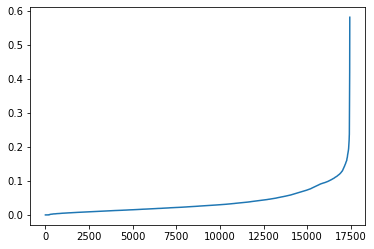

In [6]:
# Estimating the best epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [7]:
# Compute DBSCAN
db = DBSCAN(eps=.18, min_samples=20).fit(sample)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [8]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
sil = metrics.silhouette_score(sample, labels)
percent_outliers = (n_noise_/(len(sample)))*100

In [9]:
#Print Values
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print ("Percent estimated outliers: %0.1f" % percent_outliers)
print("Silhouette Coefficient: %0.3f" % sil)

Estimated number of clusters: 11
Estimated number of noise points: 1275
Percent estimated outliers: 7.3
Silhouette Coefficient: 0.186


### Applying DBSCAN on entire Spotify dataset to generate cluster labels.

In [10]:
clusters = DBSCAN(eps=.18, min_samples=20).fit(df)
clusters = pd.DataFrame(clusters.labels_, columns =['cluster']) 

In [11]:
spotify['cluster'] = clusters.cluster
spotify

,artists,id,name,year,mode_0,acousticness,explicit_0,instrumentalness,key,valence,cluster
0,['Mamie Smith'],0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,1920s,1,0.991000,1,0.000522,0.454545,0.6340,0
1,"[""Screamin' Jay Hawkins""]",0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920s,1,0.643000,1,0.026400,0.454545,0.9500,0
2,['Mamie Smith'],11m7laMUgmOKqI3oYzuhne,Golfing Papa,1920s,0,0.993000,1,0.000018,0.000000,0.6890,1
3,['Oscar Velazquez'],19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920s,0,0.000173,1,0.801000,0.181818,0.0422,1
4,['Mixe'],2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920s,1,0.295000,0,0.000246,0.909091,0.2990,2
...,...,...,...,...,...,...,...,...,...,...,...
174384,"['DJ Combo', 'Sander-7', 'Tony T']",46LhBf6TvYjZU2SMvGZAbn,The One,2020s,1,0.009170,1,0.000060,0.545455,0.1860,0
174385,['Alessia Cara'],7tue2Wemjd0FZzRtDrQFZd,A Little More,2020s,0,0.795000,1,0.000000,0.363636,0.2280,1
174386,['Roger Fly'],48Qj61hOdYmUCFJbpQ29Ob,Together,2020s,1,0.806000,1,0.920000,0.363636,0.7140,0
174387,['Taylor Swift'],1gcyHQpBQ1lfXGdhZmWrHP,champagne problems,2020s,0,0.920000,0,0.000000,0.000000,0.3200,3


### Saving DBSCAN cluster labels to file.

In [12]:
# Assign %pwd to working_dir
working_dir = %pwd

In [13]:
spotify.to_csv((working_dir)+"/Data/spotify-classlabels-DBSCAN.csv", index = False)